In [4]:
#importing the Required libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
import joblib
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
#load the Dataset

df=pd.read_csv("loan_application.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
161,LP001562,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N
591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
353,LP002142,Female,Yes,0,Graduate,Yes,5500,0.0,105.0,360.0,0.0,Rural,N
302,LP001974,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y
329,LP002087,Female,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y


# EDA(Exploratory Data Analysis)

In [10]:
df.shape

(614, 13)

There are 614 rows and 13 columns respectively present in the dataset.

In [11]:
df.duplicated().sum()

0

There are 0 duplicates present in the dataset

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 149 Nulls present in the dataset

<Axes: >

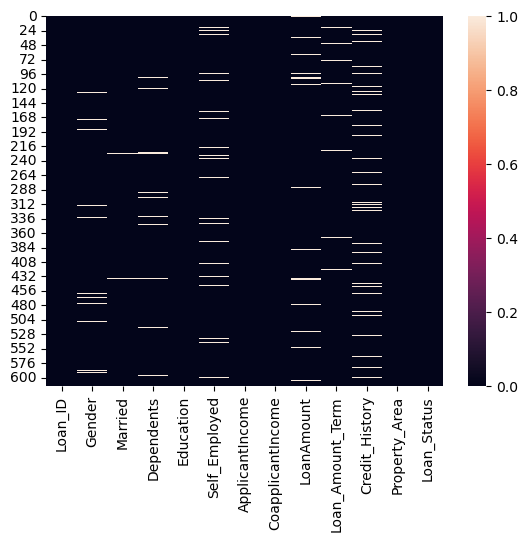

In [13]:
# Heatmap of null values
sns.heatmap(df.isnull())

Data Quality Observation:
Upon a thorough examination of the dataset, several notable observations emerge concerning the presence of missing values within each column:

Loan_ID: This column stands out with no missing values, indicating complete and consistent data.

Gender: There are 13 instances of missing values in the 'Gender' column, suggesting that certain records lack gender information.

Marital Status (Married): The 'Married' column exhibits a minor inconsistency with 3 missing values, implying that a few entries do not specify marital status.

Dependents: The 'Dependents' column raises a concern with 15 missing values, indicating that details about the number of dependents are unavailable for some records.

Education: The 'Education' column stands out with no missing values, reflecting complete data for the educational status of applicants.

Self-Employment (Self_Employed): The 'Self_Employed' column faces a notable issue with 32 missing values, signifying a significant number of records without information about self-employment status.

Applicant's Income (ApplicantIncome): No missing values are observed in the 'ApplicantIncome' column, suggesting comprehensive data on the income of applicants.

Coapplicant's Income (CoapplicantIncome): Similar to 'ApplicantIncome,' no missing values are present in this column, indicating complete information on coapplicants' income.

Loan Amount (LoanAmount): The 'LoanAmount' column highlights a concern with 22 missing values, implying that specific loan amounts are not provided for certain applicants.

Loan Amount Term (Loan_Amount_Term): There are 14 instances of missing values in the 'Loan_Amount_Term' column, indicating that the term of the loan is unspecified for some records.

Credit History (Credit_History): The 'Credit_History' column presents a notable issue with 50 missing values, signifying that a significant portion of the dataset lacks credit history information.

Property Area: The 'Property_Area' column maintains data integrity with no missing values, offering complete information regarding the property area of applicants.

Loan Status (Loan_Status): The 'Loan_Status' column is notably free of missing values, ensuring completeness in recording the final loan approval status for each applicant.

Addressing these missing values effectively is crucial before embarking on any data analysis or modeling endeavors. Proper handling of missing data ensures the accuracy and reliability of subsequent analytical tasks.

In [14]:
df.columns # Column names

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset Information Observation:
Upon a comprehensive review of the dataset information, several key observations stand out:

The dataset comprises a total of 614 entries (rows), representing individual records.

It encompasses 13 columns, each representing diverse features and aspects of the data.

The columns exhibit a variety of data types:

8 columns are categorized as object data type, signifying their nature as categorical variables.
4 columns are classified as float64 data type, designating them as numerical variables.
1 column is denoted as int64 data type, indicating it as a numerical variable.
Within the dataset, specific columns exhibit instances of missing values:

'Dependents' is affected by 15 missing values.
'Self_Employed' records 32 instances of missing values.
'LoanAmount' displays 22 missing values.
'Loan_Amount_Term' contains 14 instances of missing values.
'Credit_History' presents a noteworthy 50 missing values.
The column 'Loan_Status' emerges as the pivotal target variable for the analysis, representing the ultimate loan approval status.

These astute observations underscore the imperative need for comprehensive data preprocessing. Such preprocessing activities include addressing the presence of missing values and, potentially, transforming categorical variables into a suitable format conducive to subsequent analysis and modeling endeavors.

In [16]:
# checking number of unique values in each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Unique Values Observation:
Upon a meticulous examination of the dataset, noteworthy insights regarding the presence of unique values in each column come to the forefront:

Loan_ID: This column comprises 614 distinct loan IDs, affirming the absence of duplicate entries, ensuring data integrity.

Gender: A mere 2 unique values unveil the gender of applicants, simplifying gender classification into two categories.

Marital Status (Married): Similarly, 2 unique values delineate the marital status of applicants, distinguishing between married and non-married individuals.

Dependents: The 'Dependents' column encompasses 4 unique values, distinctly portraying the count of dependents for applicants.

Education: With just 2 unique values, this column categorizes applicants based on their educational background.

Self-Employment (Self_Employed): A concise 2 unique values systematize the employment status of applicants, classifying them as self-employed or otherwise.

Applicant's Income (ApplicantIncome): In this column, 505 distinct values provide a comprehensive spectrum of applicants' income levels.

Coapplicant's Income (CoapplicantIncome): The presence of 287 unique values encapsulates the variety in coapplicants' income across the dataset.

Loan Amount (LoanAmount): A spectrum of 203 unique values mirrors the range of loan amounts sought by applicants.

Loan Amount Term (Loan_Amount_Term): With 10 unique values, this column quantifies the loan term in months, offering a variety of choices.

Credit History (Credit_History): A binary system, with 2 unique values, characterizes the credit history status of applicants.

Property Area: An ensemble of 3 unique values categorizes the property area in which applicants are located.

Loan Status (Loan_Status): Boasting 2 unique values, this critical column signifies the ultimate outcome, whether a loan application was approved or not.

These distinct value counts lay bare the diversity and distribution inherent within each column, rendering them valuable for deciphering the dataset's underlying characteristics and potential patterns.

# value Counts

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
**************************************************
Male      489
Female    112
Name: Gender, dtype: int64
**************************************************
Yes    398
No     213
Name: Married, dtype: int64
**************************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**************************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**************************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
**************************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
**************************************

Observations:

Within the "Dependents" column, we have identified a category labeled as "3+". To ensure uniformity and precision, we will harmonize this category by representing it as "3," signifying the maximum count of dependents.

Furthermore, several columns containing floating-point values exhibit decimals followed exclusively by zeros. In pursuit of bolstering data consistency and streamlining analysis, we will transition these float values into integers.

In [18]:
# Replace "3+" with "3" in the Dependents column
df['Dependents'] = df['Dependents'].replace('3+', '3')

# Verify the changes
print(df['Dependents'].value_counts())

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [19]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
#Filling Null values

# Imputation techniques
impute_techniques = {
    'Gender':'mode',
    'Married':'mode',
    'Dependents':'mode',
    'Self_Employed':'mode',
    'LoanAmount':'median',
    'Loan_Amount_Term':'median',
    'Credit_History':'mode'
}
    
# Impute based on defined techniques
for column, technique in impute_techniques.items():
    if technique == 'mode':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    elif technique == 'mean':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif technique == 'median':
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No Null values are present


<Axes: >

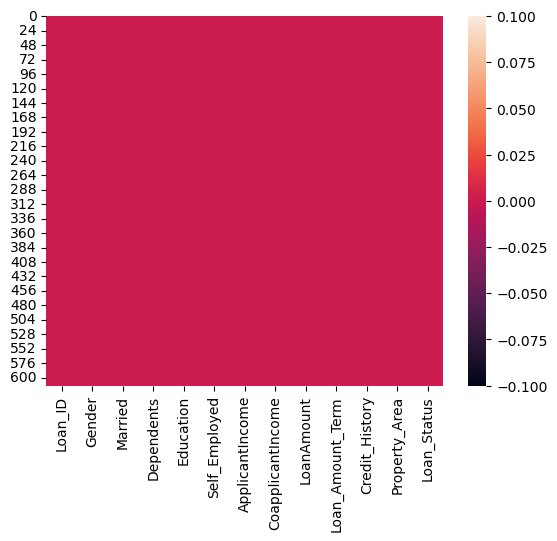

In [22]:
sns.heatmap(df.isnull())

In [23]:
# Convert selected float columns to integers
int_columns = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for column in int_columns:
    df[column] = df[column].astype(int)

# Verify the changes
print(df.dtypes)

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object


In [24]:
## checking info after handling null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int32 
 8   LoanAmount         614 non-null    int32 
 9   Loan_Amount_Term   614 non-null    int32 
 10  Credit_History     614 non-null    int32 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int32(4), int64(1), object(8)
memory usage: 52.9+ KB


In [25]:
# Statistical Understanding
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,145.752443,342.410423,0.855049
std,6109.041673,2926.24876,84.107233,64.428629,0.352339
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,128.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


OBSERVATION:
    

Upon scrutinizing the dataset's summary statistics using the describe() function, we unearth the following significant insights:

Applicant Income: The dataset reveals an average applicant income of approximately 5403, with income values spanning from as low as 150 to as high as 81000. This numerical feature exhibits notable variability, evident from the substantial standard deviation of 6109.

Coapplicant Income: Within this column, the average coapplicant income hovers around 1621, showcasing a range from 0 to 41667. Similar to the applicant income, the coapplicant income column also boasts substantial variability, as indicated by a standard deviation of 2926.

Loan Amount: In the realm of loan amounts sought, the dataset portrays an average loan amount of approximately 146. The spectrum of loan amounts applied for encompasses values stretching from a minimum of 9 to a maximum of 700. The presence of a standard deviation of approximately 84 underscores the variation in loan amounts.

Loan Amount Term: A significant proportion (75%) of loan applicants opt for a 360-month (30-year) loan term, although some variability exists around this preferred term. The spectrum of loan terms extends from a minimum of 12 months to a maximum of 480 months, showcasing diverse preferences.

Credit History: The credit history of the majority of applicants (approximately 86%) reflects a favorable score of 1 (indicative of good credit). In contrast, around 14% of applicants exhibit a credit history score of 0, implying either poor credit or a lack of credit history.

These summary statistics unveil pivotal insights into the central tendency, dispersion, and distribution of numerical variables. The wide-ranging and diverse financial profiles of loan applicants are evident in the variability of applicant income, coapplicant income, and loan amount. Additionally, the predominance of applicants with a positive credit history may wield a substantial influence on loan approval determinations.

In [26]:
#Checking Skewness
skewness = df.skew()
skewness

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491530
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Key Points on Skewness Observation:

Dependents: The 'Dependents' column exhibits a moderate positive skewness of approximately 1.02, implying a slight tail on the right side of the distribution. This suggests a relatively higher number of applicants with more dependents.

ApplicantIncome: The 'ApplicantIncome' column displays a high positive skewness of about 6.54, indicating a pronounced right skewness. This signifies a long tail of applicants with significantly higher income values, which might include potential outliers.

CoapplicantIncome: The 'CoapplicantIncome' column reveals a substantial positive skewness of around 7.49, highlighting a pronounced right skewness. This points to a distribution with an extended tail on the right, suggesting a concentration of lower coapplicant incomes.

LoanAmount: The 'LoanAmount' column demonstrates a moderate positive skewness of about 2.74. This implies a distribution with a longer tail on the right side, indicative of a higher frequency of applicants seeking larger loan amounts.

Loan_Amount_Term: The 'Loan_Amount_Term' column features a moderate negative skewness of approximately -2.40, indicating a distribution skewed towards shorter loan terms. This means that shorter loan terms are more common among applicants.

Credit_History: In the 'Credit_History' column, a moderate negative skewness of about -2.02 is observed. This points to a tail on the left side of the distribution, suggesting a higher frequency of applicants with good credit histories.

These skewness values reveal valuable insights into the distributional characteristics of numerical columns, shedding light on data distribution asymmetry, the presence of outliers, and the prevalence of certain applicant profiles in the dataset.

# Taking Insigts By Visualizing The Data

Loan_ID

In [27]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

This column appears to be an identifier and may not contribute significantly to the prediction. Therefore, I intend to delete this column

In [28]:
df.drop('Loan_ID',axis=1,inplace=True)


# Gender

In [29]:
df['Gender'].value_counts()


Male      502
Female    112
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

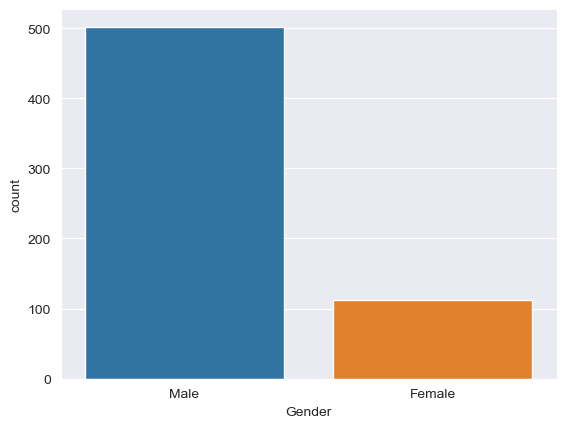

In [30]:
sns.set_style('darkgrid')
sns.countplot(x='Gender', data=df)

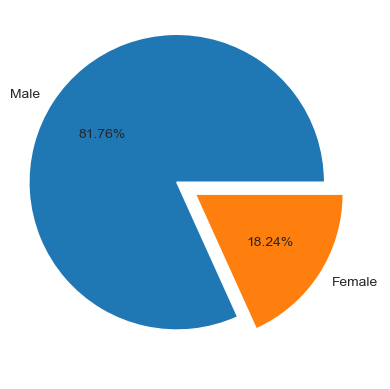

In [31]:
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));


In [32]:
df.groupby('Gender')['Loan_Status'].value_counts()


Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

Gender and Loan Status Observation:

Upon examining the loan status distribution with respect to gender, the following significant observation is noted:

In the dataset, the majority of approved loans ('Y') are granted to males, with 347 approvals in contrast to 155 rejections. For females, there are 75 loan approvals and 37 rejections. This observation indicates a greater approval rate for males compared to females.

This gender-focused analysis offers insights into potential gender-related disparities in loan approval rates present in the dataset. Further investigation is warranted to understand the factors contributing to this distinction in loan approval between genders.

# Married

In [33]:
df['Married'].value_counts()


Yes    401
No     213
Name: Married, dtype: int64

<Axes: xlabel='Married', ylabel='count'>

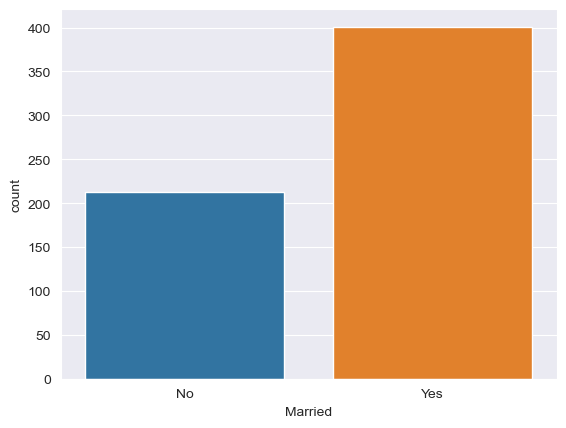

In [34]:

sns.set_style('darkgrid')
sns.countplot(x='Married', data=df)

In [35]:
df.groupby('Married')['Loan_Status'].value_counts()


Married  Loan_Status
No       Y              134
         N               79
Yes      Y              288
         N              113
Name: Loan_Status, dtype: int64

Marital Status and Loan Status Observation:
Upon examining the distribution of loan status concerning marital status, we observe the following crucial findings:

For applicants who are not married, there are 134 approved loans ('Y') and 79 rejections ('N'). In contrast, among married applicants, 288 loans are approved, and 113 loans are rejected. This observation implies that a higher percentage of married individuals receive loan approvals compared to their unmarried counterparts.

This analysis based on marital status sheds light on the potential impact of marital status on loan approval rates within the dataset. Further exploration is warranted to understand the underlying factors contributing to this variation in loan approval between married and unmarried individuals.

# Dependents

In [36]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

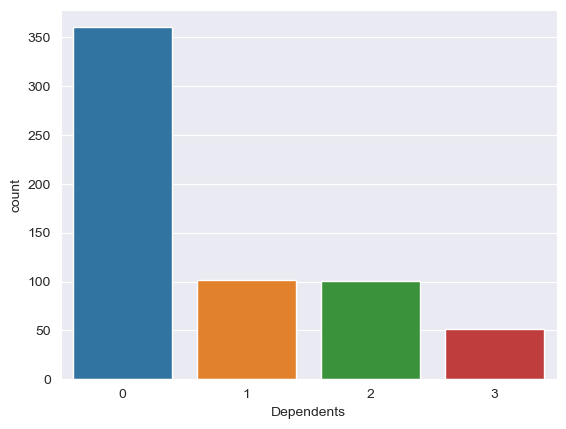

In [37]:
sns.set_style('darkgrid')
sns.countplot(x='Dependents', data=df)

<Axes: xlabel='Dependents', ylabel='count'>

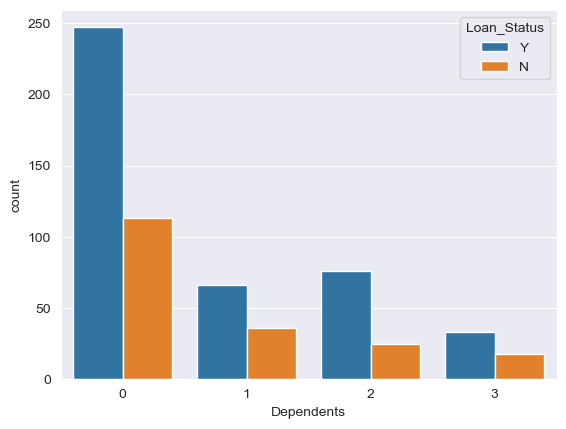

In [40]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

In [41]:
df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              247
            N              113
1           Y               66
            N               36
2           Y               76
            N               25
3           Y               33
            N               18
Name: Loan_Status, dtype: int64

Dependents and Loan Status Insight:
    
Upon evaluating the loan status distribution based on the number of dependents, the following significant findings emerge:

Applicants with 0 dependents: Among those with no dependents, 247 loans are approved ('Y'), while 113 loans are rejected ('N'). This signifies a notably higher approval rate for applicants without dependents.

Applicants with 1 dependent: For applicants with a single dependent, 66 loans are approved, and 36 loans are rejected.

Applicants with 2 dependents: Among applicants with two dependents, 76 loans are approved, and 25 loans are rejected.

Applicants with 3 dependents: Applicants with three dependents see 33 approved loans and 18 rejections.

This observation implies that applicants without dependents tend to have a higher loan approval rate compared to those with dependents. Furthermore, there is a trend of decreasing loan approval rates as the number of dependents increases.

A deeper analysis can explore the underlying factors contributing to this trend and investigate the influence of the number of dependents on loan approval decisions.

# Education

In [42]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

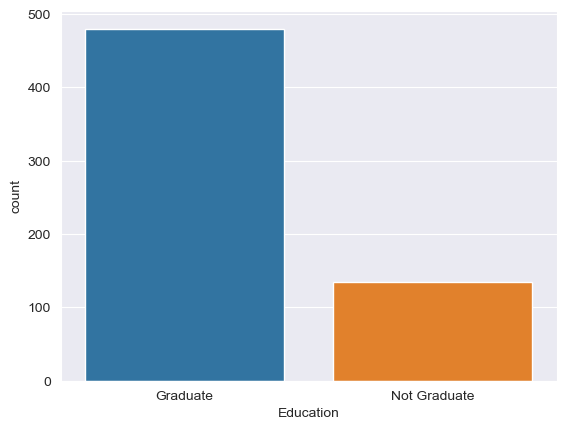

In [43]:
sns.set_style('darkgrid')
sns.countplot(x='Education', data=df)

<Axes: xlabel='Education', ylabel='count'>

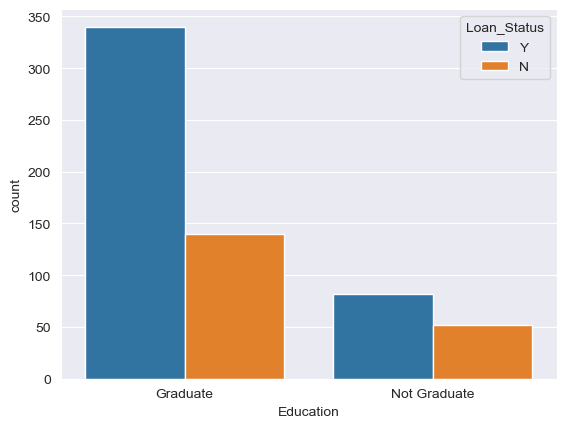

In [45]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [46]:
df.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

Education and Loan Status Insight:
    
Upon assessing the loan status distribution based on education level, we unveil the following significant findings:

Graduate Applicants: Among individuals with graduate education, 340 loans are approved ('Y'), while 140 loans are rejected ('N'). This points to a notably higher approval rate for graduate applicants.

Non-Graduate Applicants: For non-graduate applicants, 82 loans are approved, and 52 loans are rejected.

This observation strongly suggests that applicants with a graduate education tend to have a higher loan approval rate compared to non-graduate applicants. It is evident that educational attainment plays a significant role in loan approval decisions.

Further analysis can delve into the potential factors contributing to the contrast in loan approval rates between graduate and non-graduate applicants.

# Self_Employed

In [47]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

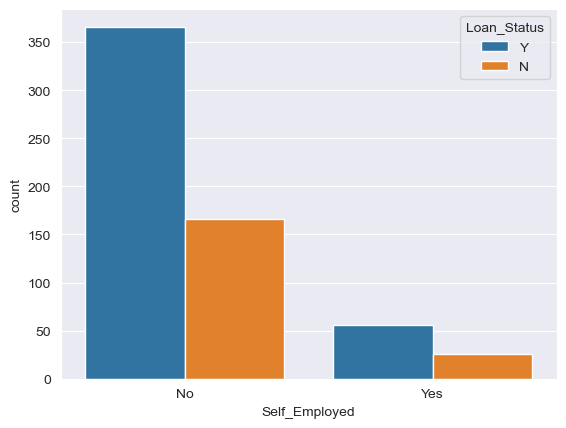

In [49]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [50]:
df.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              366
               N              166
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

Self-Employment and Loan Approval Insight:
Upon examining the distribution of loan approval based on self-employment status, we uncover the following noteworthy findings:

Not Self-Employed: Among applicants who are not self-employed, 366 loans have been approved ('Y'), while 166 loans have been rejected ('N'). This highlights a significantly higher approval rate for non-self-employed applicants.

Self-Employed: Self-employed applicants have 56 approved loans and 26 rejected loans.

This observation strongly suggests that individuals who are not self-employed tend to enjoy a higher loan approval rate compared to self-employed applicants. The data underscores the influence of self-employment status on loan approval decisions.

Further analysis may delve into the potential factors contributing to the contrast in loan approval rates between self-employed and non-self-employed applicants, taking into account variables such as income stability, credit history, and risk assessment.

This analysis sheds light on the impact of self-employment status on loan approval outcomes and emphasizes the importance of comprehending how various applicant attributes can shape lending decisions.

# ApplicantIncome

In [51]:
df['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

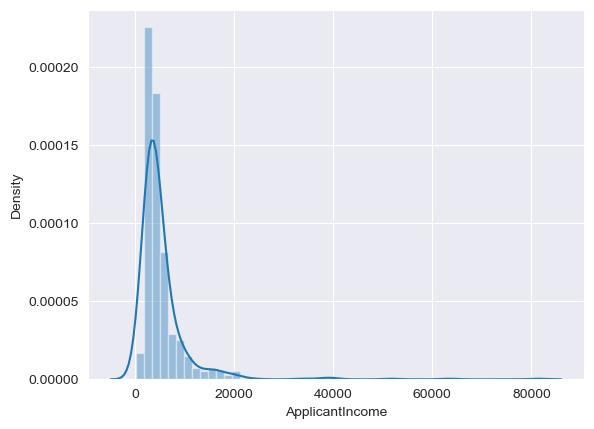

In [52]:
sns.distplot(df['ApplicantIncome'])

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

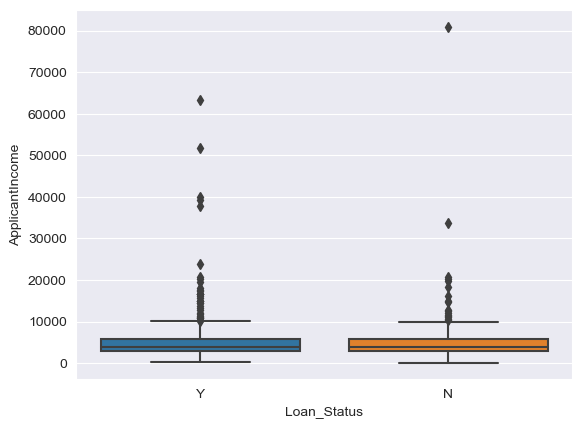

In [53]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

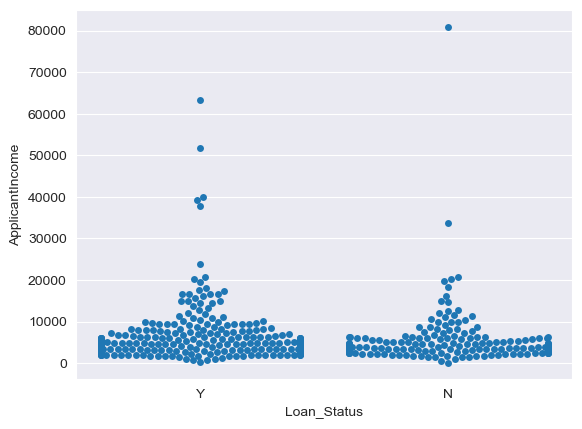

In [54]:
sns.swarmplot(x='Loan_Status', y='ApplicantIncome', data=df)

# CoapplicantIncome

In [55]:
df['CoapplicantIncome'].value_counts()

0       273
2500      5
2083      5
1666      5
2250      3
       ... 
2791      1
1010      1
1695      1
2598      1
240       1
Name: CoapplicantIncome, Length: 287, dtype: int64

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

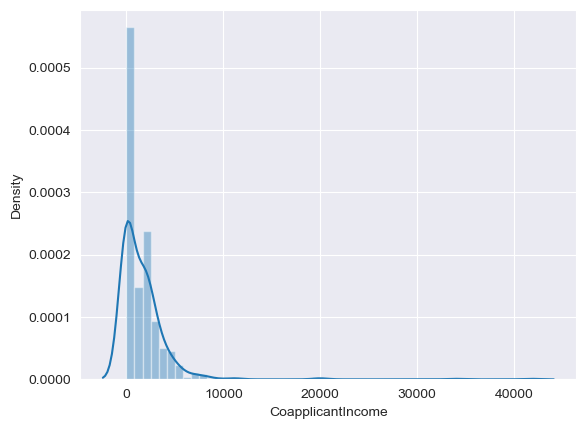

In [56]:
sns.distplot(df['CoapplicantIncome'])

CoapplicantIncome column is Right skewed

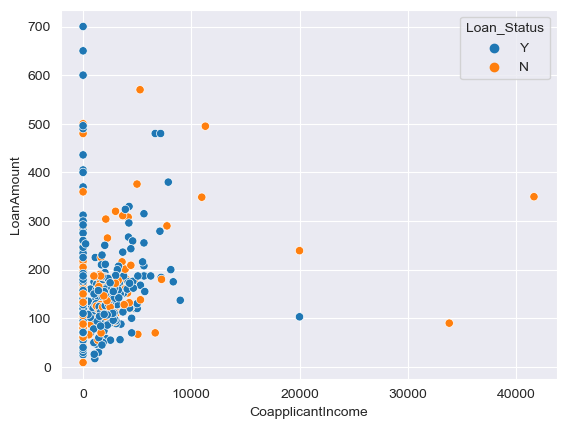

In [57]:
sns.scatterplot(x = "CoapplicantIncome", y= "LoanAmount", data=df,hue="Loan_Status");

# LoanAmount

<Axes: xlabel='LoanAmount', ylabel='Density'>

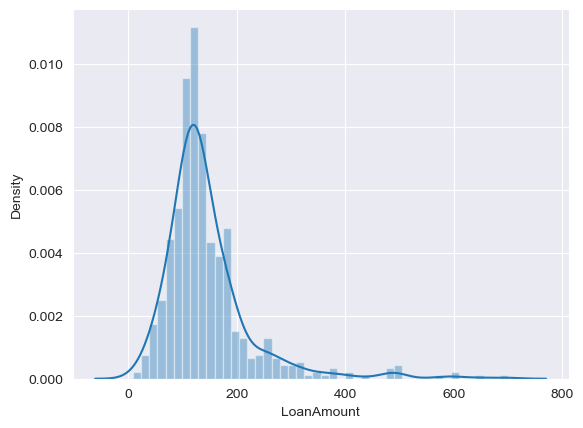

In [58]:
sns.distplot(df['LoanAmount'])

LoanAmount is also right skewed

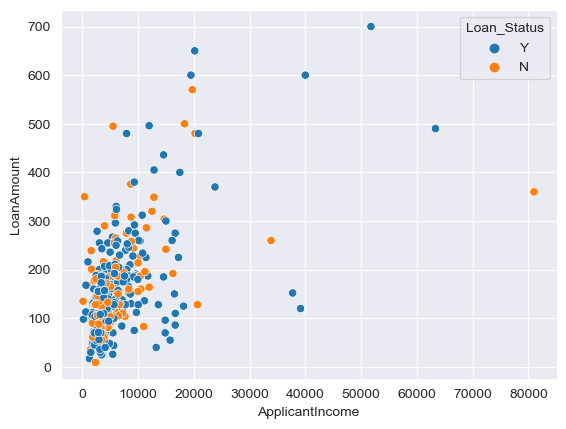

In [59]:
sns.scatterplot(x = "ApplicantIncome", y= "LoanAmount", data=df,hue="Loan_Status");


when ApplicantIncome is increse the LoanAmount is also incresed and chance of loan approvel is greater

# Loan_Amount_Term

In [60]:
df['Loan_Amount_Term'].value_counts()

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

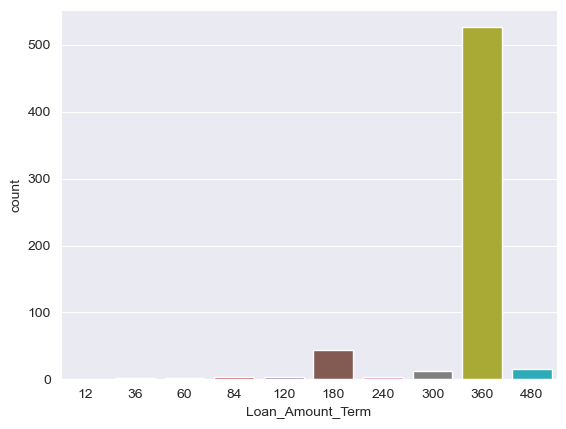

In [62]:
sns.countplot(x='Loan_Amount_Term',data=df)


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

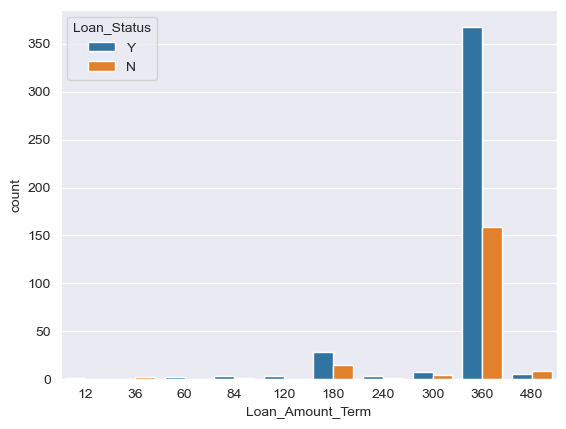

In [63]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)

# Property_Area

In [64]:
df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

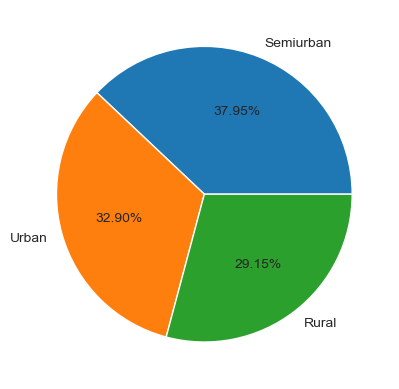

In [65]:
plt.pie(df['Property_Area'].value_counts().values,labels=df['Property_Area'].value_counts().index,autopct='%1.2f%%');


<Axes: xlabel='Property_Area', ylabel='count'>

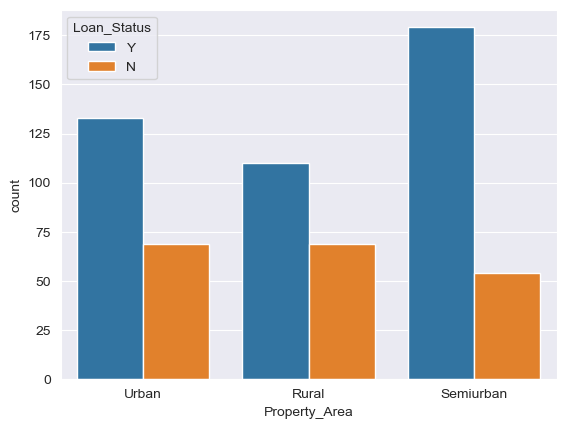

In [66]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)


In [67]:
df.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

Property Area and Loan Approval Patterns:
Examining the distribution of loan approval based on property area, we unveil the following significant findings:

Rural Property Area: Among applicants from rural property areas, 110 loans have been approved ('Y'), while 69 loans have been rejected ('N'). This highlights a notably higher approval rate for loan applicants residing in rural areas.

Semiurban Property Area: Among applicants from semiurban property areas, 179 loans have been approved, and 54 loans have been rejected.

Urban Property Area: Among applicants from urban property areas, 133 loans have been approved, and 69 loans have been rejected.

This observation strongly suggests that loan applicants from rural property areas tend to enjoy a higher loan approval rate compared to those from semiurban and urban areas. It implies that the property area might significantly influence loan approval decisions, potentially due to economic and demographic disparities among these areas.

Further analysis may delve into the factors contributing to these variations in loan approval rates based on property area, exploring the socioeconomic aspects that underlie these disparities.

In [69]:
df.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Loan_Status

In [70]:
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

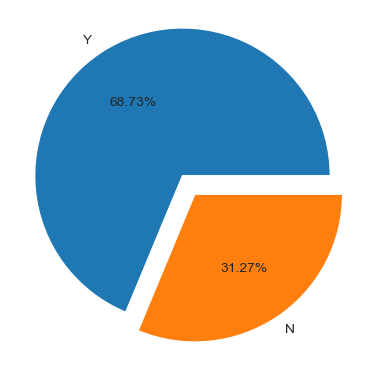

In [71]:
plt.pie(df['Loan_Status'].value_counts().values,labels=df['Loan_Status'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));


Separating Numerical And Categorical Columns

In [72]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

In [73]:
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [74]:
categorical_columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

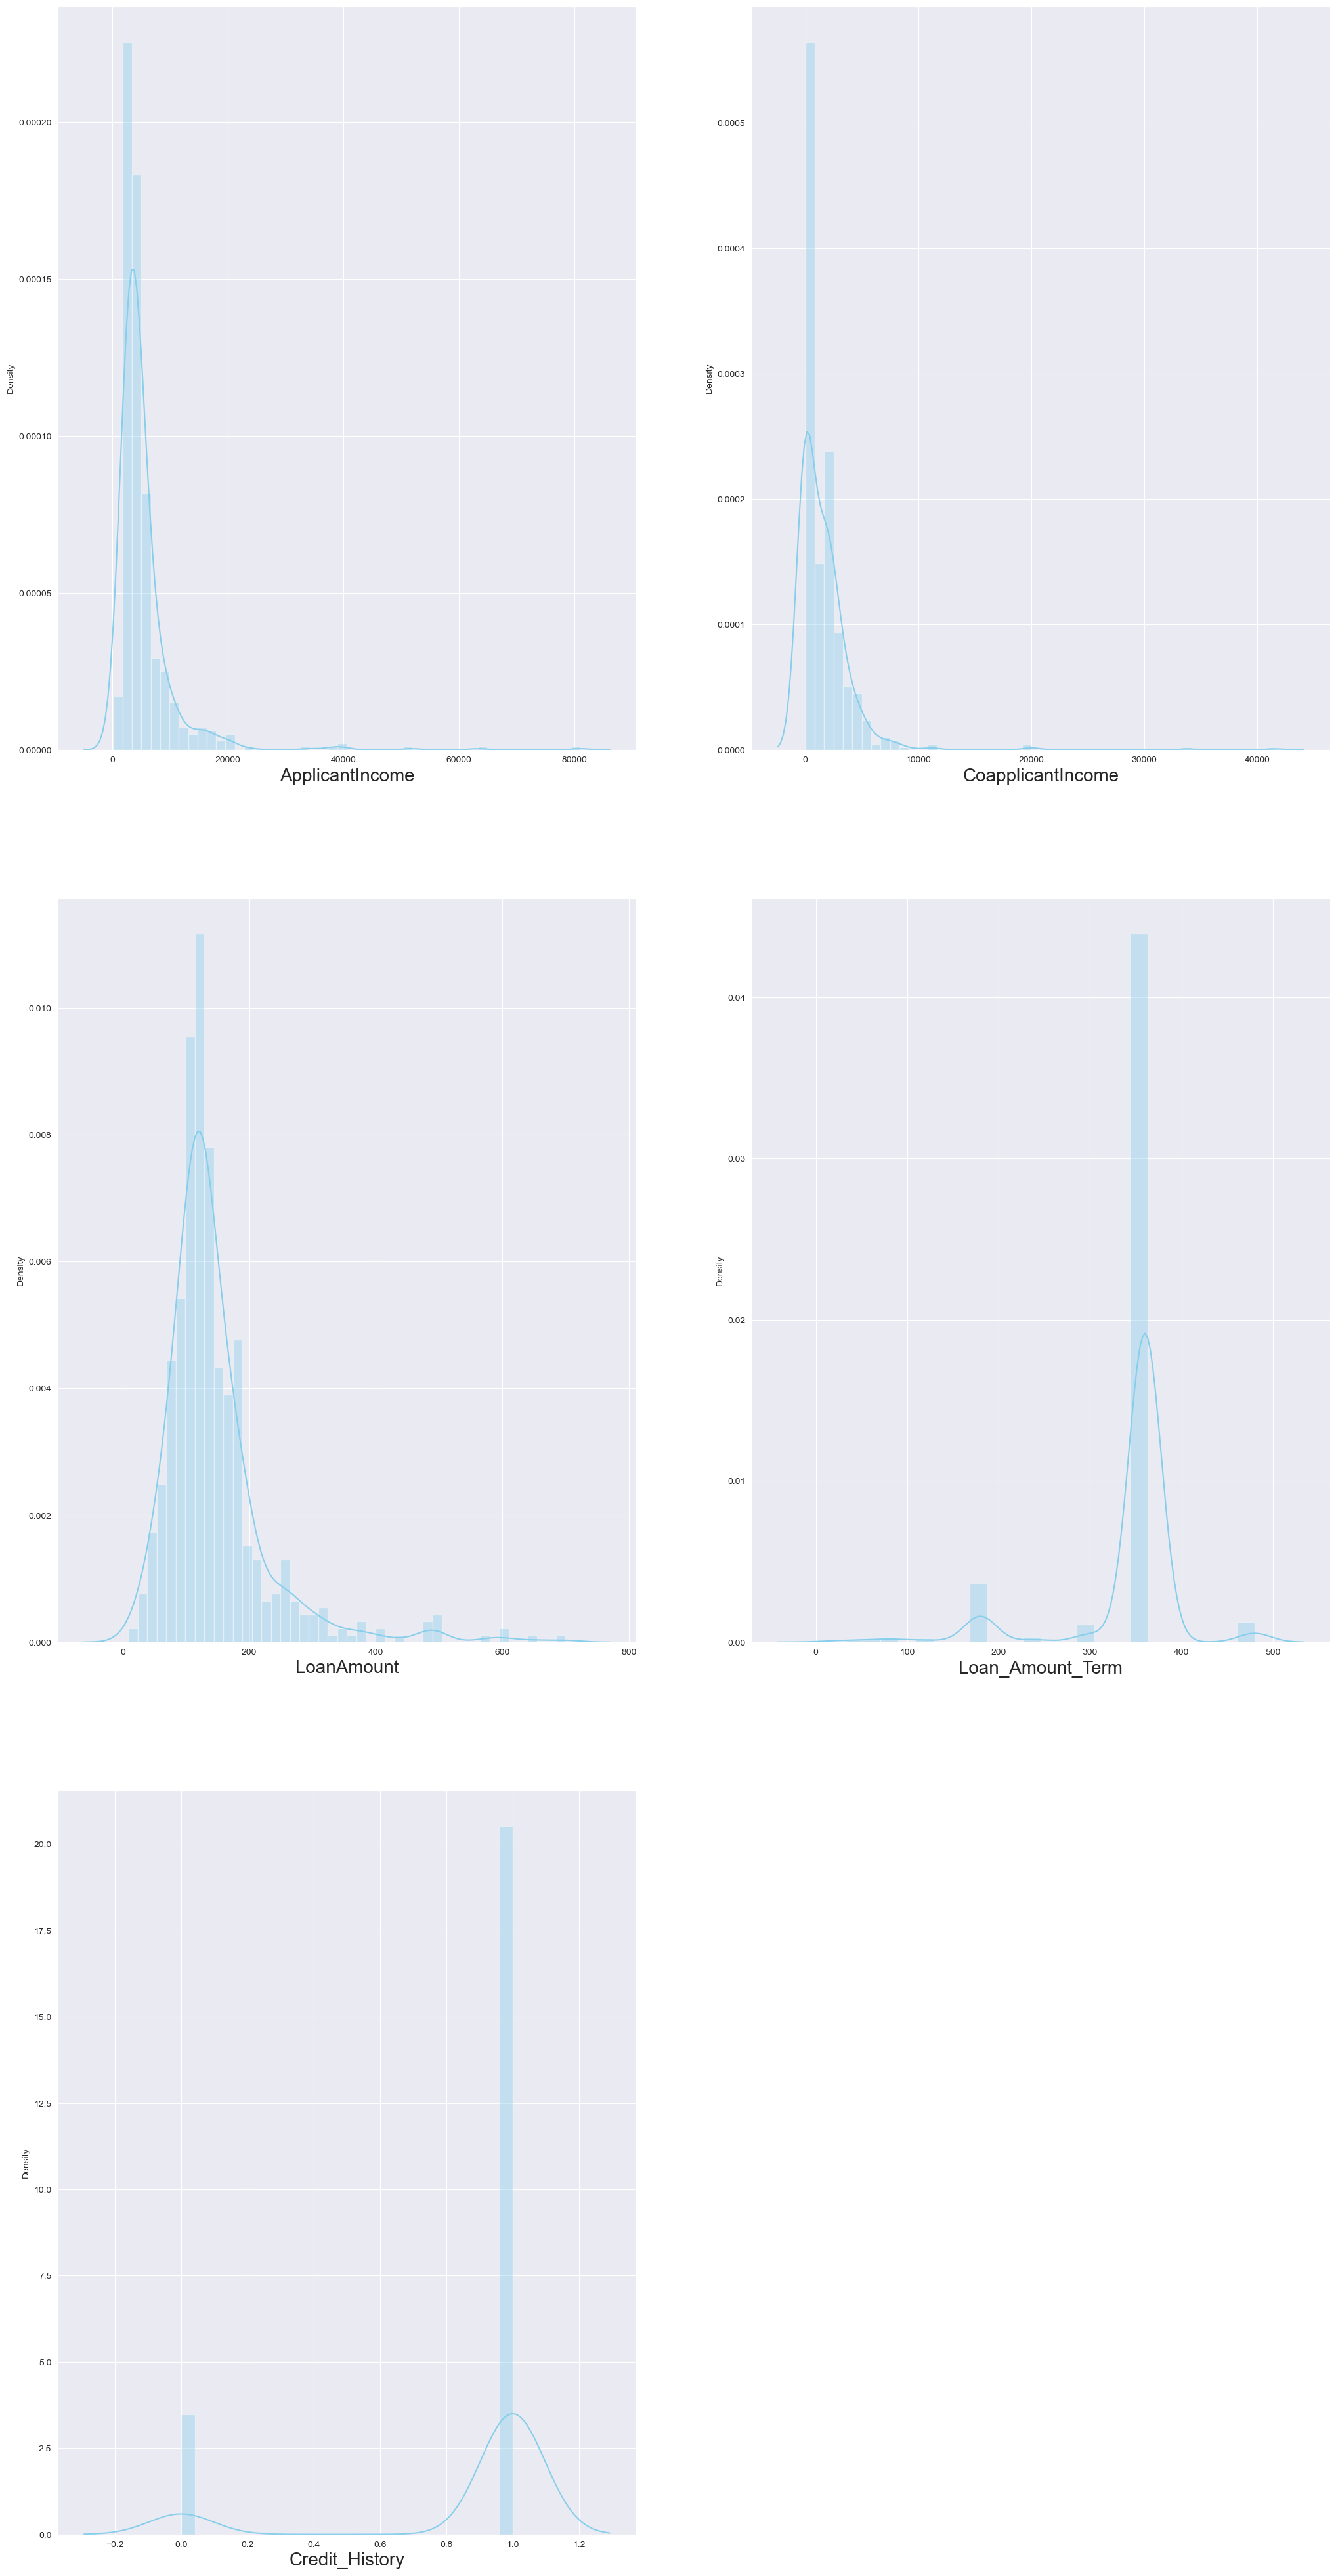

In [75]:
#Distribution plot for Seeing Data Distribution

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

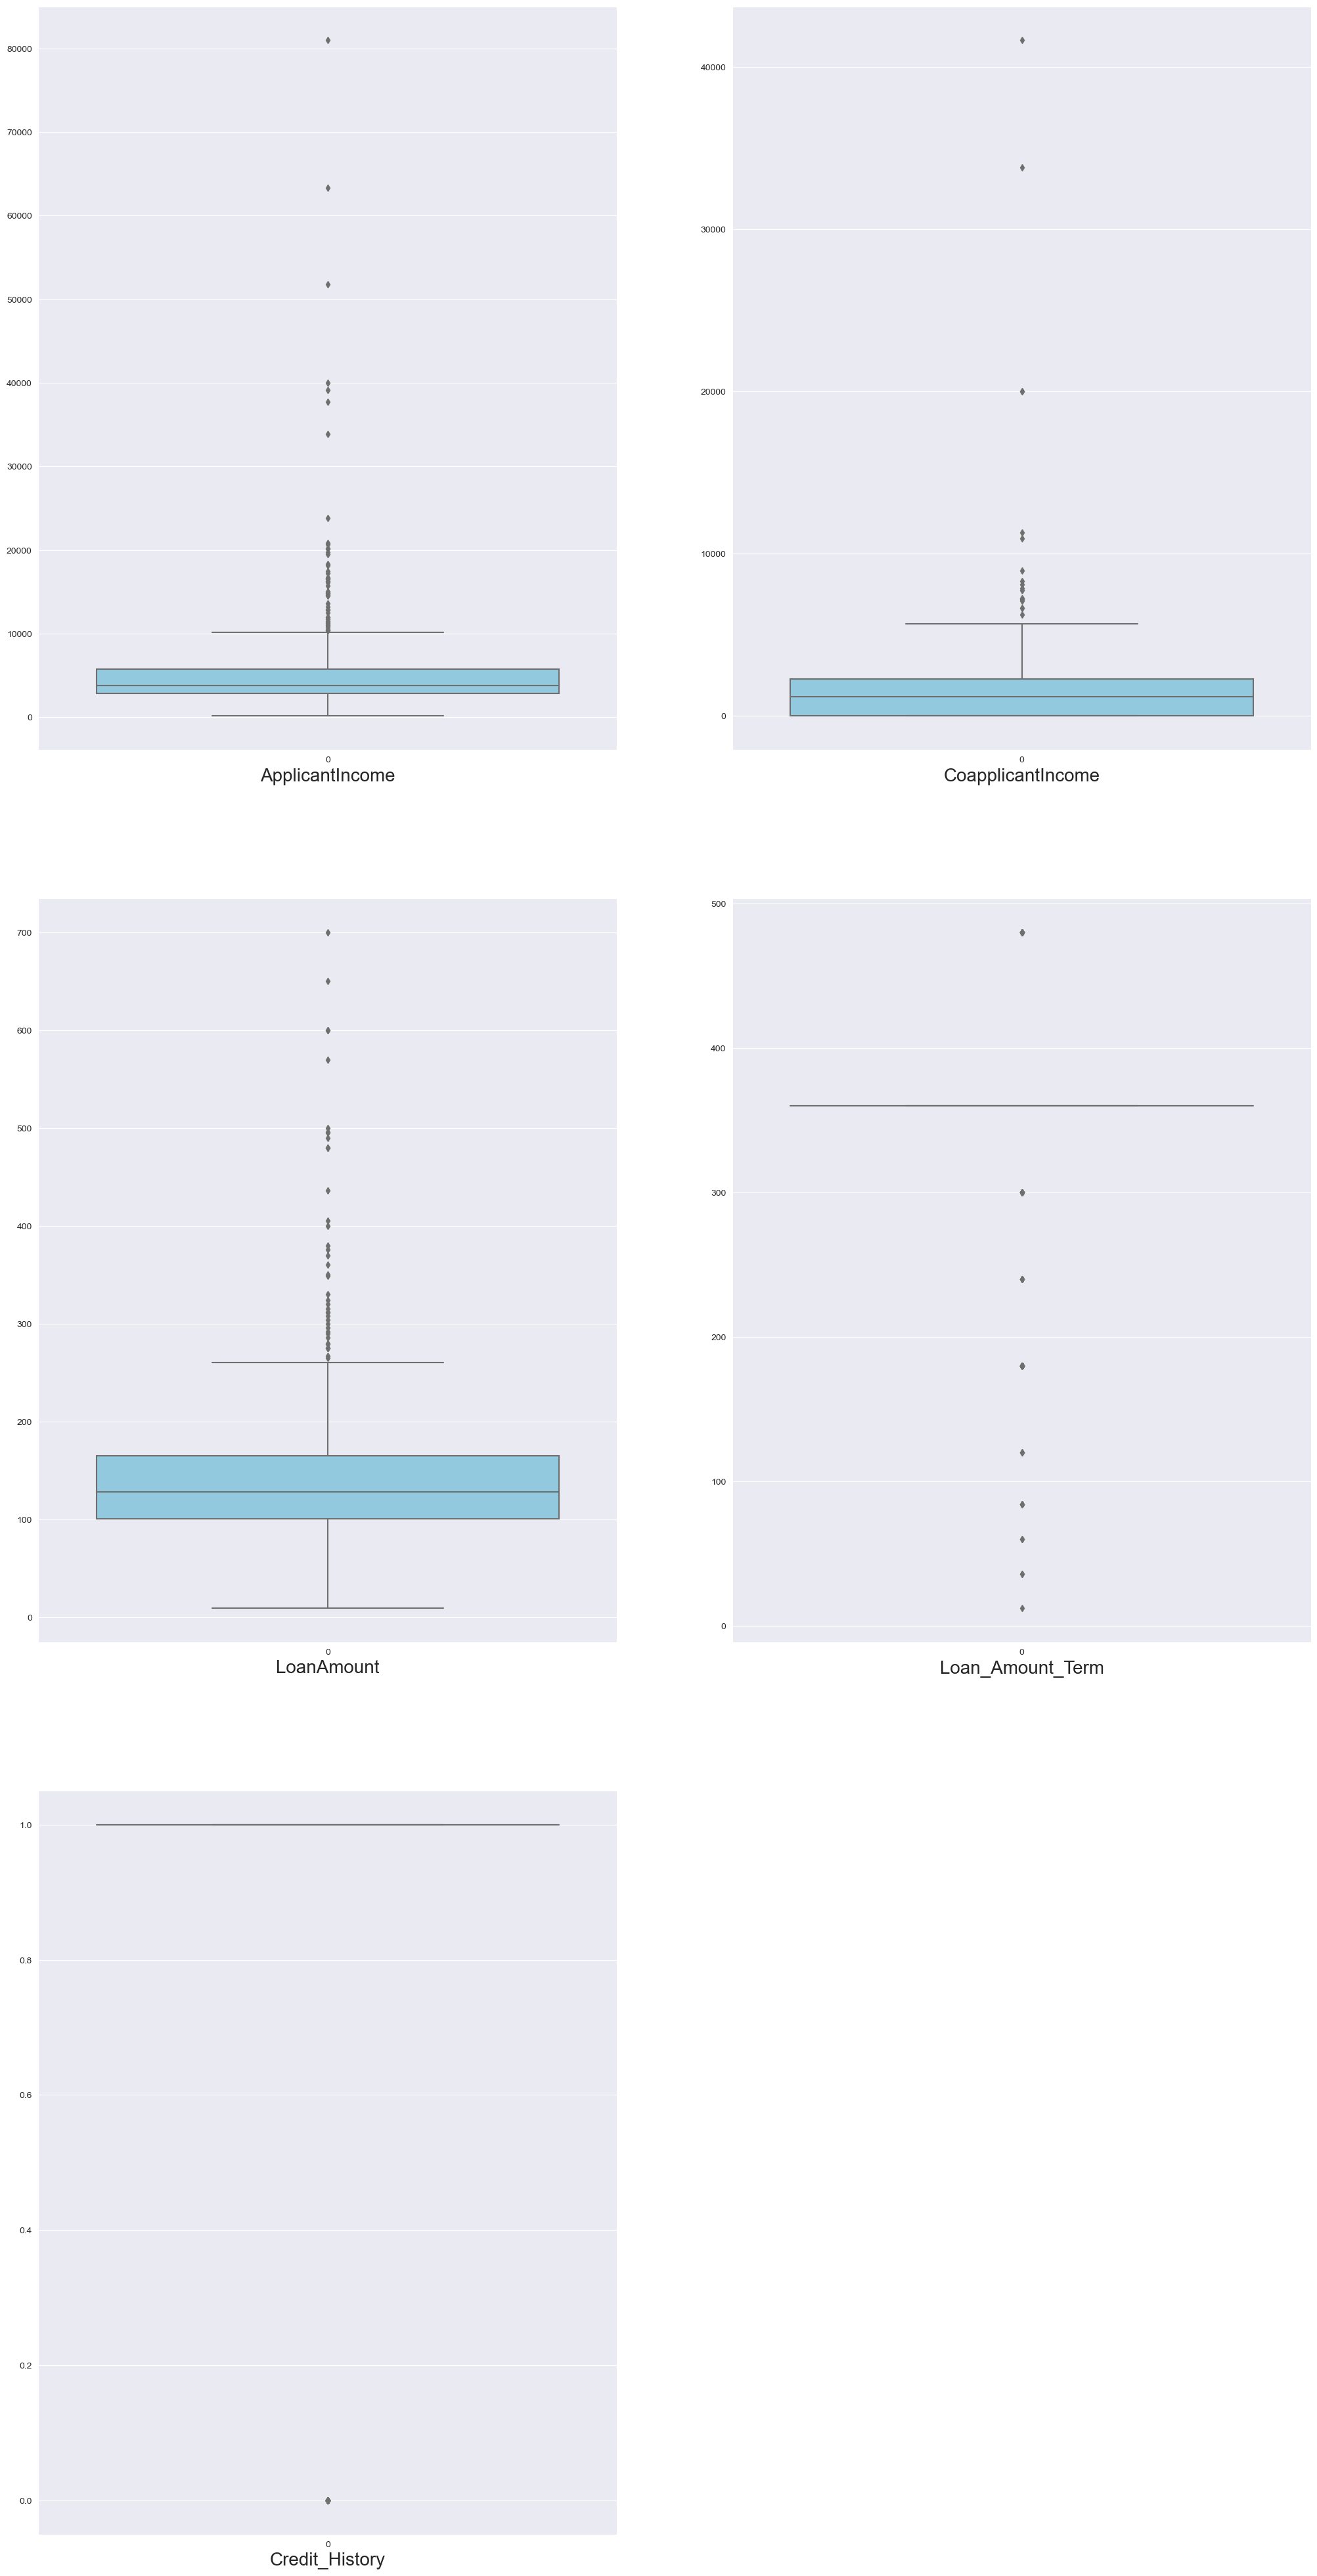

In [76]:
#BoxPlot for seeing Outliers


plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

The outliers are present in every column

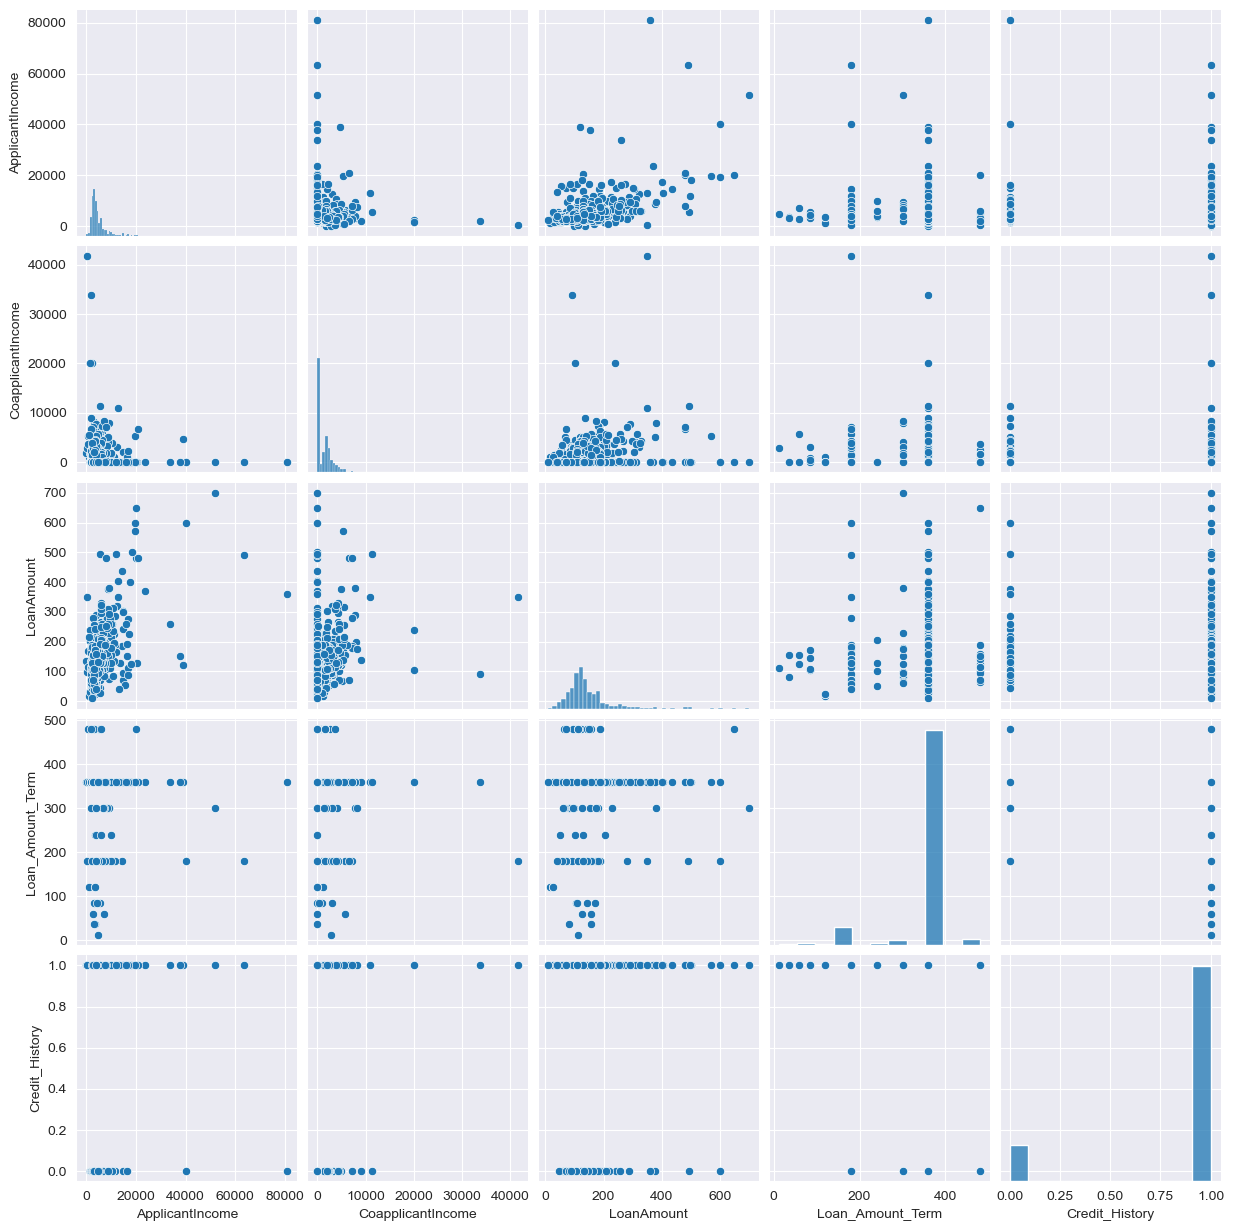

In [77]:
#Multivariate Analysis


#Pairplot

sns.pairplot(df)

# Cleaning Data

1.Encoding the categorical columns using Label Encoding

In [78]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']

In [79]:
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

In [80]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


2.Handling Outliers

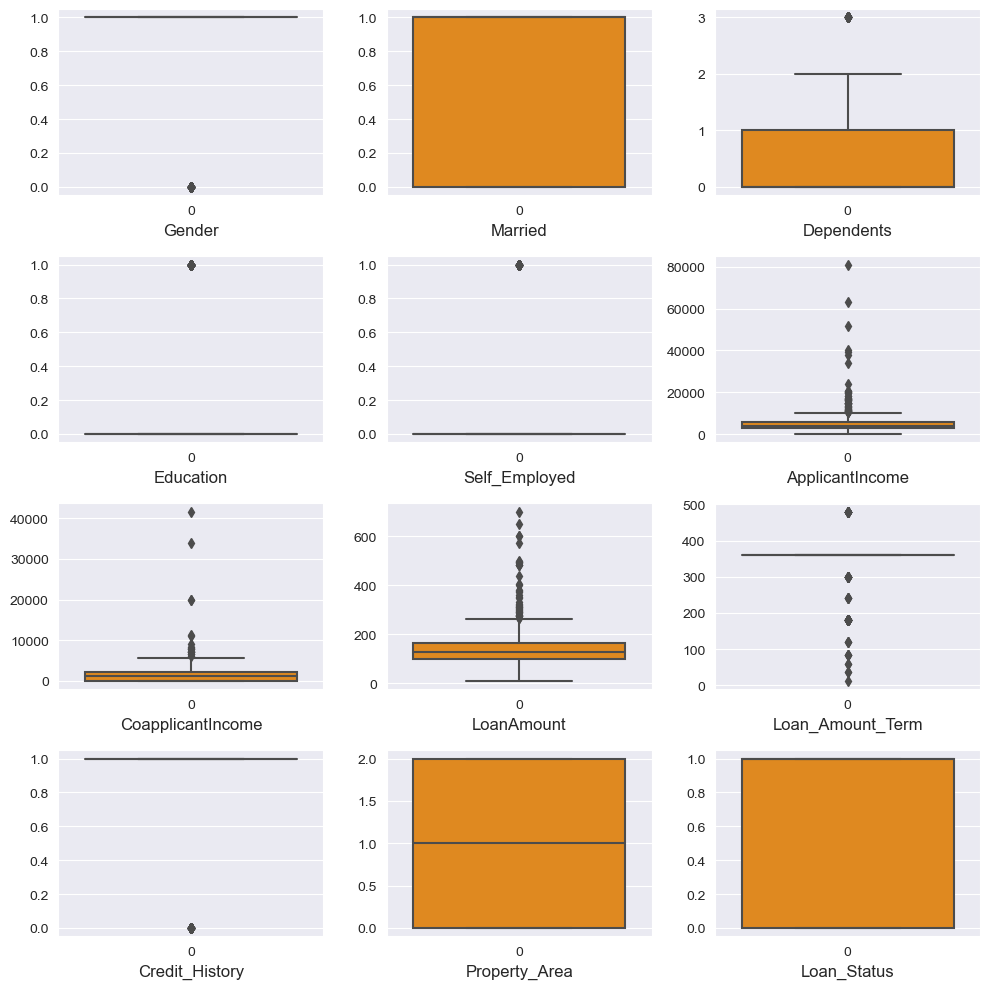

In [81]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Handling Outliers By Z score

In [82]:
clolumns_to_be_handle = df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]

In [83]:
z=np.abs(zscore(clolumns_to_be_handle))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.072991,0.554487,0.211241
1,0.134412,0.038731,0.211241
2,0.393747,0.554487,0.948996
3,0.462062,0.251980,0.306435
4,0.097728,0.554487,0.056551
...,...,...,...
609,0.410130,0.554487,0.889500
610,0.212557,0.554487,1.258378
611,0.437174,0.472404,1.276168
612,0.357064,0.554487,0.490816


In [84]:
df= df[(z<3).all(axis=1)]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71,360,1,0,1
610,1,1,3,0,0,4106,0,40,180,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


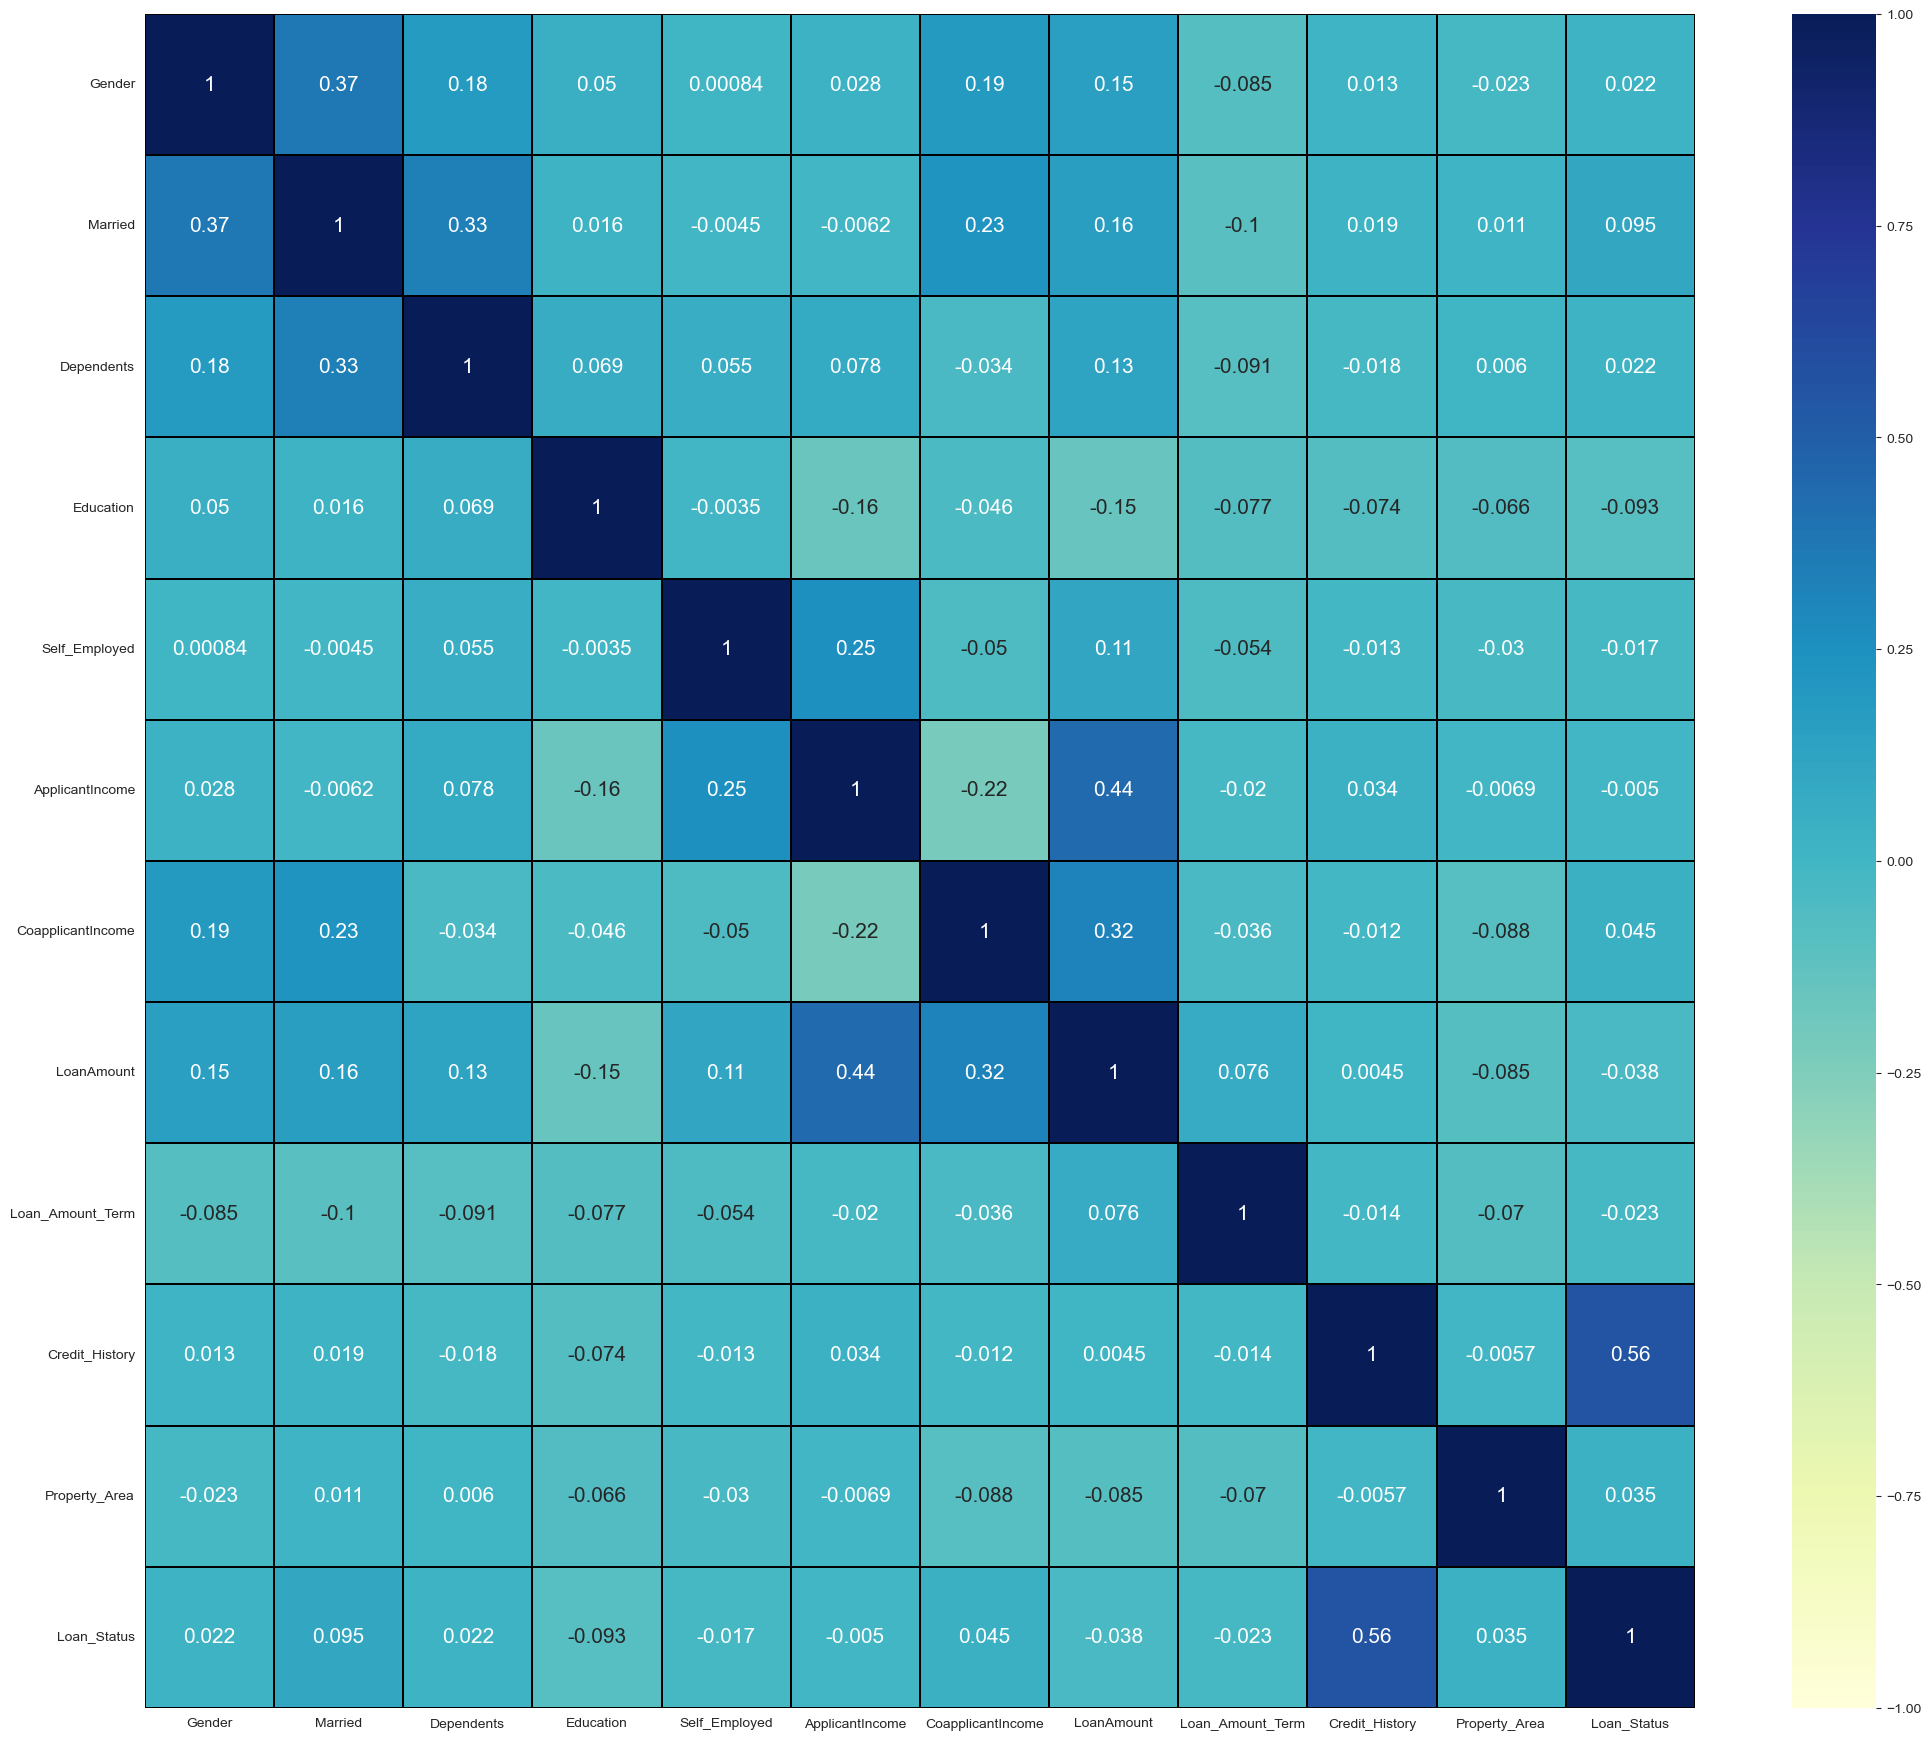

In [85]:
#Heatmap

plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

3.Checking Correlation with Target Column

In [86]:
#correlation with target column
correlation_with_quality = df.corr()['Loan_Status'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Loan_Status          1.000000
Credit_History       0.555908
Married              0.095124
Education            0.092852
CoapplicantIncome    0.044815
LoanAmount           0.037704
Property_Area        0.034894
Loan_Amount_Term     0.023119
Gender               0.021942
Dependents           0.021937
Self_Employed        0.016617
ApplicantIncome      0.005043
Name: Loan_Status, dtype: float64


We can observe that "ApplicantIncome" and "Self_Employed" are relatively weakly correlated with the label, indicating that they may have limited contribution to the prediction. But i am not deleting "ApplicantIncome"

In [87]:
# dropping irrelevant columns
df.drop('Self_Employed',axis=1,inplace=True)

5.Checking Correlation between columns to columns

In [88]:
#schecking correlation
df_corr = df.corr()
df_corr

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.027728,0.190220,0.150043,-0.084919,0.013432,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.006164,0.229955,0.159808,-0.100776,0.019377,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.078305,-0.033735,0.132766,-0.091158,-0.017650,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.160966,-0.045700,-0.151997,-0.076546,-0.073799,-0.065623,-0.092852
ApplicantIncome,0.027728,-0.006164,0.078305,-0.160966,1.000000,-0.218845,0.440055,-0.020069,0.034203,-0.006917,-0.005043
CoapplicantIncome,0.190220,0.229955,-0.033735,-0.045700,-0.218845,1.000000,0.315174,-0.036140,-0.012245,-0.087736,0.044815
LoanAmount,0.150043,0.159808,0.132766,-0.151997,0.440055,0.315174,1.000000,0.075801,0.004538,-0.084519,-0.037704
Loan_Amount_Term,-0.084919,-0.100776,-0.091158,-0.076546,-0.020069,-0.036140,0.075801,1.000000,-0.013960,-0.070405,-0.023119
Credit_History,0.013432,0.019377,-0.017650,-0.073799,0.034203,-0.012245,0.004538,-0.013960,1.000000,-0.005694,0.555908
Property_Area,-0.022807,0.010586,0.006005,-0.065623,-0.006917,-0.087736,-0.084519,-0.070405,-0.005694,1.000000,0.034894


We are writing this function to see those columns which are highly correlated with each other

In [89]:
correlation_threshold = 0.80
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [90]:
features_to_drop

set()

# VIF

In [91]:
df1=df.copy()

In [92]:
#drop target column
df1.drop('Loan_Status',axis=1, inplace=True)

In [93]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [94]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [95]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Gender,1.199834
1,Married,1.333581
2,Dependents,1.180797
3,Education,1.068072
4,ApplicantIncome,1.544754
5,CoapplicantIncome,1.454572
6,LoanAmount,1.671860
7,Loan_Amount_Term,1.049694
8,Credit_History,1.008178
9,Property_Area,1.025179


There is no Multicollinearty we are good to go For Prediction

# Splitting into Feature and Target column

In [96]:
X= df.drop('Loan_Status', axis=1)
Y=df['Loan_Status']

In [97]:
#removing Skewness
X.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
ApplicantIncome      2.164762
CoapplicantIncome    1.353192
LoanAmount           1.114173
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.063183
dtype: float64

In [98]:
#Transformed by Power Transformer

skew=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [99]:
transformed=power_transform(X[skew].values)

In [100]:

pd.DataFrame(transformed).skew()

0    0.028063
1   -0.186188
2    0.061412
dtype: float64

In [101]:
#Standardization

sc=StandardScaler()

In [102]:
X=sc.fit_transform(transformed)


In [103]:
#Data Balancing

sm=SMOTE()


In [104]:
x,y=sm.fit_resample(X,Y)

In [105]:
x.shape , y.shape


((814, 3), (814,))

# Model Training

Find best Randomstate

In [106]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6319018404907976 on Random State = 146


In [107]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

In [108]:
#Defining All Classification Models

LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

In [109]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('--'*30)

Accuracy_Score of  LogisticRegression() is 63.190184049079754
Confusion Matrix of  LogisticRegression()  is 
 [[52 26]
 [34 51]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        78
           1       0.66      0.60      0.63        85

    accuracy                           0.63       163
   macro avg       0.63      0.63      0.63       163
weighted avg       0.63      0.63      0.63       163

------------------------------------------------------------
Accuracy_Score of  RidgeClassifier() is 63.190184049079754
Confusion Matrix of  RidgeClassifier()  is 
 [[52 26]
 [34 51]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        78
           1       0.66      0.60      0.63        85

    accuracy                           0.63       163
   macro avg       0.63      0.63      0.63       163
weighted avg       0.63      0.63      0.63       163

---------------------------------

In [110]:
#CrossValidation

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('--'*50)

Accuracy_Score of  LogisticRegression() is 63.190184049079754
cross Validation accuracy score of  LogisticRegression()  is  55.15640384761039
----------------------------------------------------------------------------------------------------
Accuracy_Score of  RidgeClassifier() is 63.190184049079754
cross Validation accuracy score of  RidgeClassifier()  is  55.27986063773385
----------------------------------------------------------------------------------------------------
Accuracy_Score of  DecisionTreeClassifier() is 66.87116564417178
cross Validation accuracy score of  DecisionTreeClassifier()  is  63.2719836400818
----------------------------------------------------------------------------------------------------
Accuracy_Score of  SVC() is 63.190184049079754
cross Validation accuracy score of  SVC()  is  54.30053775657049
----------------------------------------------------------------------------------------------------
Accuracy_Score of  KNeighborsClassifier() is 68.0981595092

RandomForestClassifier gave best accuracy score and minimum difference for generalise model

# Hyperparameter tuning on RandomForestClassifier

In [111]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [112]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [113]:
grid_search.best_estimator_


RandomForestClassifier(max_depth=10, n_estimators=200)

In [114]:
grid_search.best_params_


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [115]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7116564417177914

After applying hypermetertuning RandomForestClassifier is giving 70% accuracy

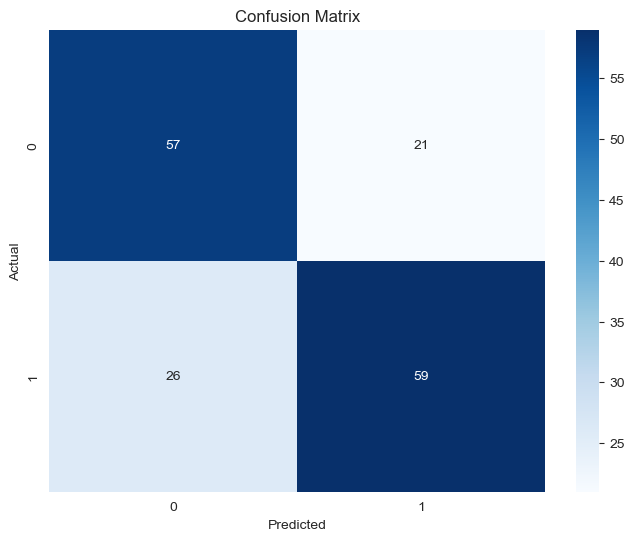

In [117]:
#Confusion matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [119]:
#Saving the Model


joblib.dump(grid_search.best_estimator_,"Loan_prediction_project.pkl")

['Loan_prediction_project.pkl']